# **Task 5 To explore Business Analytics**

**Perform ‘Exploratory Data Analysis’ on the provided dataset
SampleSuperstore.**

You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice

### **Importing library and Reading Dataset**

In [280]:
# Import the `pandas` library as `pd`
import pandas as pd
import numpy as np

# Load in the data with `read_csv()`
data = pd.read_excel('SampleSuperstore.xls')
print("Data imported succesfully")

# Print out `data`
data.info()

Data imported succesfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        


### **Dropping unnecessary columns & Displaying first 3 rows & checking shape of the data**

In [ ]:
data = data.drop(["Row ID"], axis=1)  #deleting "Row ID", since it is of no use.

In [ ]:
# Inspecting the first 3 rows
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
data.shape

(9994, 20)

### **Checking and Correcting Datatypes**

In [ ]:
data.info()  #gives information of all variables(columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [ ]:
#correcting the datatypes
data['Postal Code'] = data['Postal Code'].astype('object')
data['Quantity'] = data['Quantity'].astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   object        
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

### **To check and delete invalid values**

In [ ]:
data.isnull() #to check if not we have any invalids values in the dataset.

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.dropna(inplace=True)  #to remove the invalid records within our dataset.

### **Checking overall Sales & Profit of the company**


In [ ]:
#Checking Total Sales & Profit of the company
Sales=sum(data["Sales"])
Profit=sum(data["Profit"])

print("Overall Sales of the company is ", Sales, "dollors")
print("Overall Profits of the company is ", Profit, "dollors")

Overall Sales of the company is  2297200.860299955 dollors
Overall Profits of the company is  286397.02170000126 dollors


**Overall Sales of the company is  2297200.860299955 dollors.**

**Overall Profits of the company is  286397.02170000126 dollors.**

### **Creating new variables(columns) in the data!**

In [ ]:
data['Revenue'] = data['Sales'] - data['Profit']   # creating Revenue Column
data['GrossPrice'] = (data['Revenue'] - data['Profit']) / data['Quantity']  #creating gross price column
data['NetPrice'] = data['GrossPrice'] - (data['GrossPrice'] * data['Discount'])  #creating netprice column
data = data.drop(columns=['GrossPrice']) #deleting grossprice column , since it was only use to create netprice column
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,NetPrice
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,41.9136,220.0464,89.0664
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,0.0,219.5820,512.3580,97.5920
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.0,6.8714,7.7486,0.4386


### **Data visualization**

In [ ]:
# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### **Categorical data**


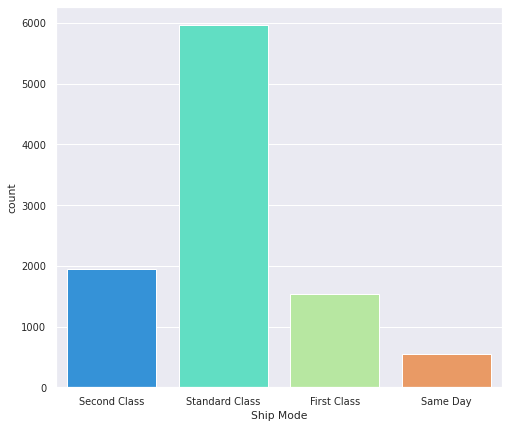

In [202]:
plt.figure(figsize=(8,7));sns.set_style('darkgrid')
sns.countplot(x="Ship Mode",data=data, palette='rainbow')

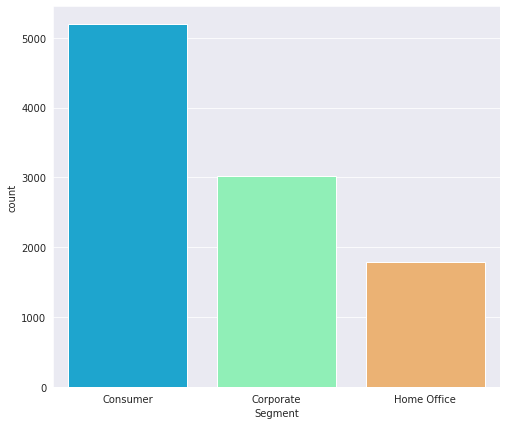

In [ ]:
plt.figure(figsize=(8,7));sns.set_style('darkgrid')
sns.countplot(x='Segment',data=data, palette='rainbow')

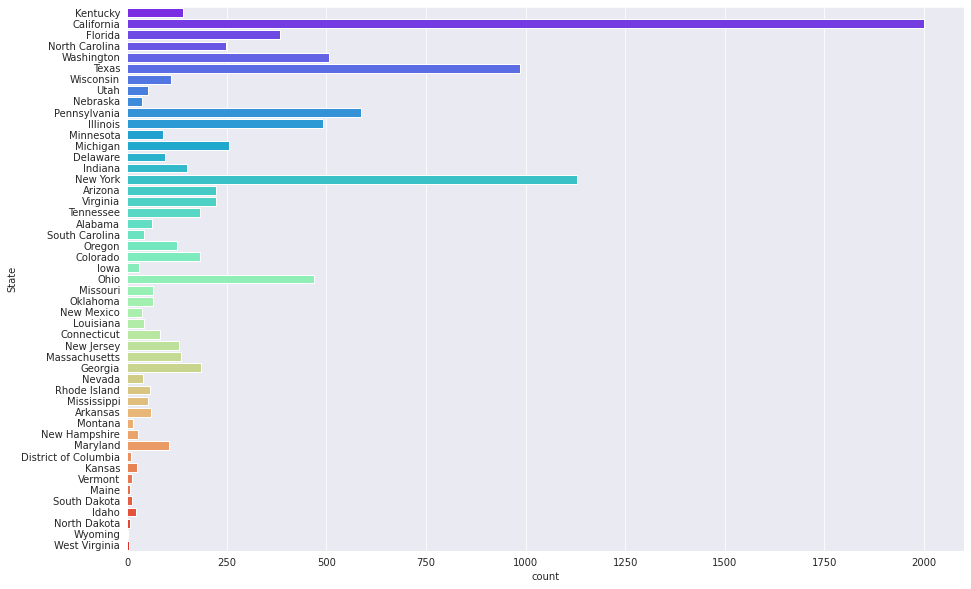

In [ ]:
plt.figure(figsize=(15,10)); sns.set_style('darkgrid');
sns.countplot(y='State',data=data, palette='rainbow')

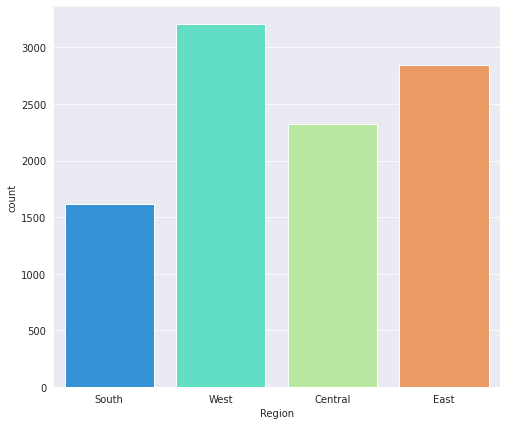

In [ ]:
plt.figure(figsize=(8,7));sns.set_style('darkgrid')
sns.countplot(x='Region',data=data, palette='rainbow')

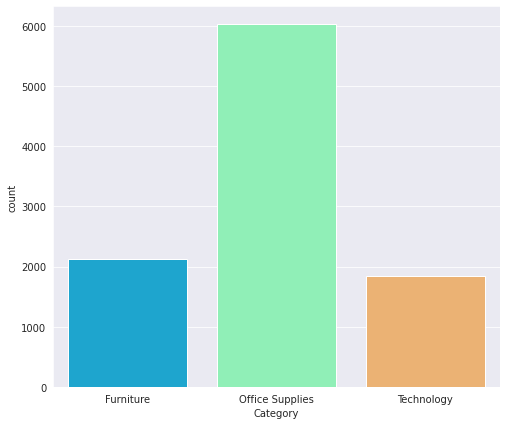

In [ ]:
plt.figure(figsize=(8,7));sns.set_style('darkgrid')
sns.countplot(x='Category',data=data, palette='rainbow')

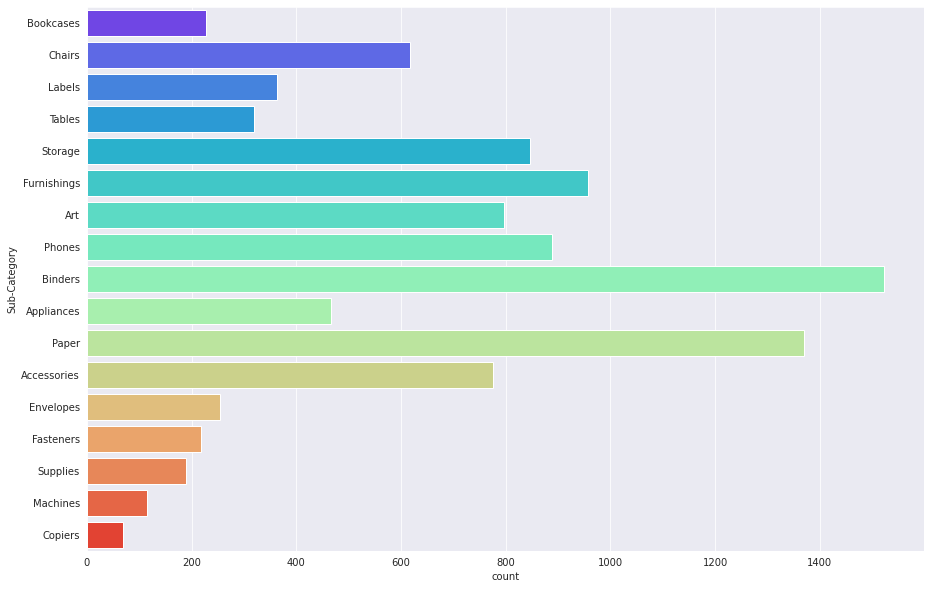

In [ ]:
plt.figure(figsize=(15,10));sns.set_style('darkgrid')
sns.countplot(y='Sub-Category',data=data, palette='rainbow')

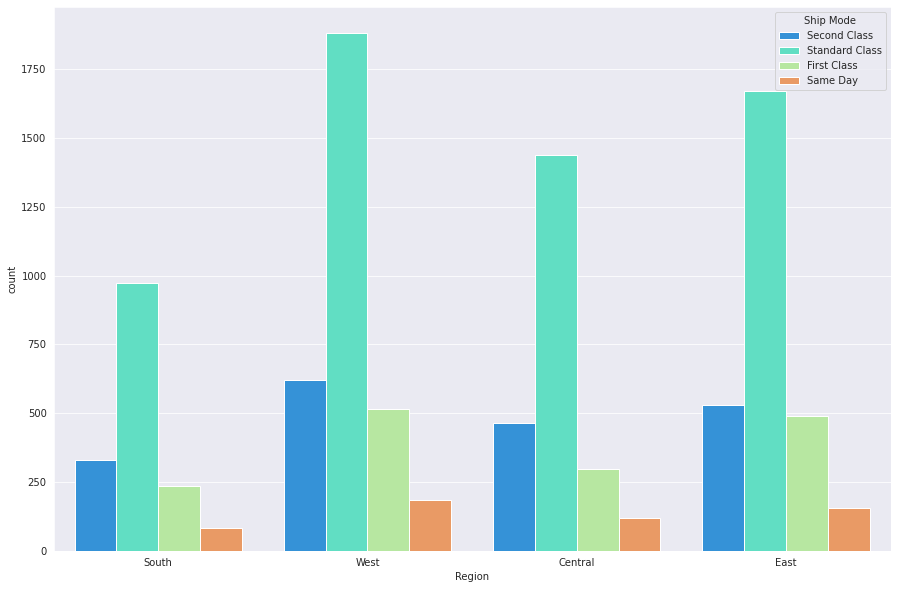

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.countplot(x='Region',hue="Ship Mode",data=data, palette='rainbow')

<Figure size 1440x720 with 0 Axes>

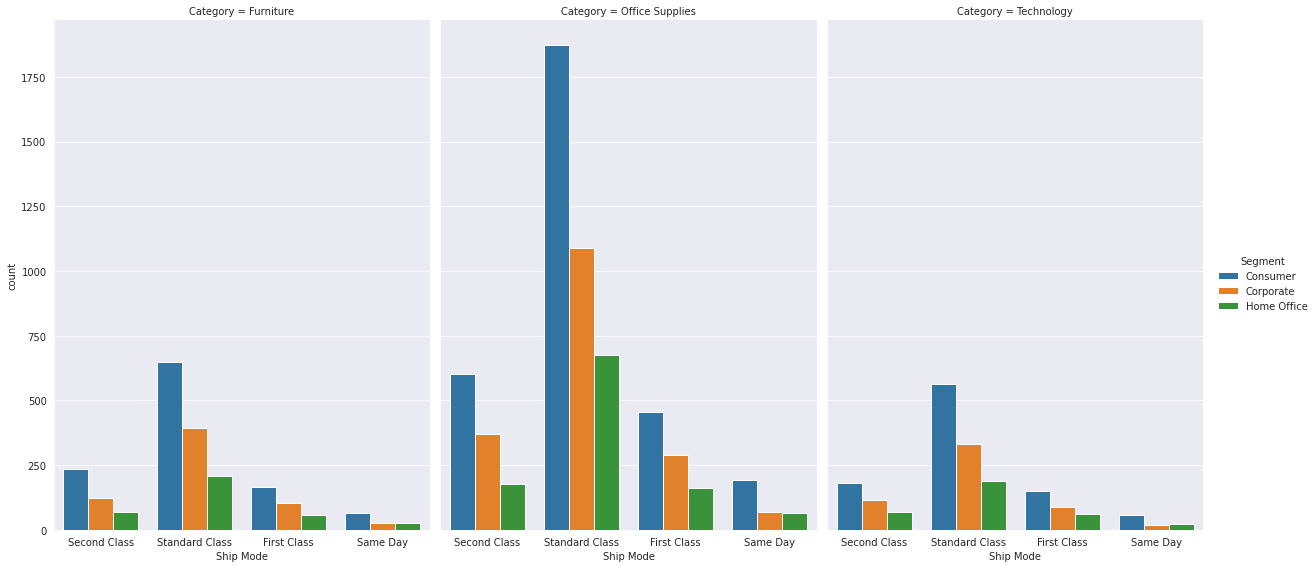

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x="Ship Mode", hue="Segment", col="Category",
                data=data, kind="count",
                height=8, aspect=.7);

we can see that for any category, Standard class shiping mode is highest with consumer segment

<Figure size 1440x720 with 0 Axes>

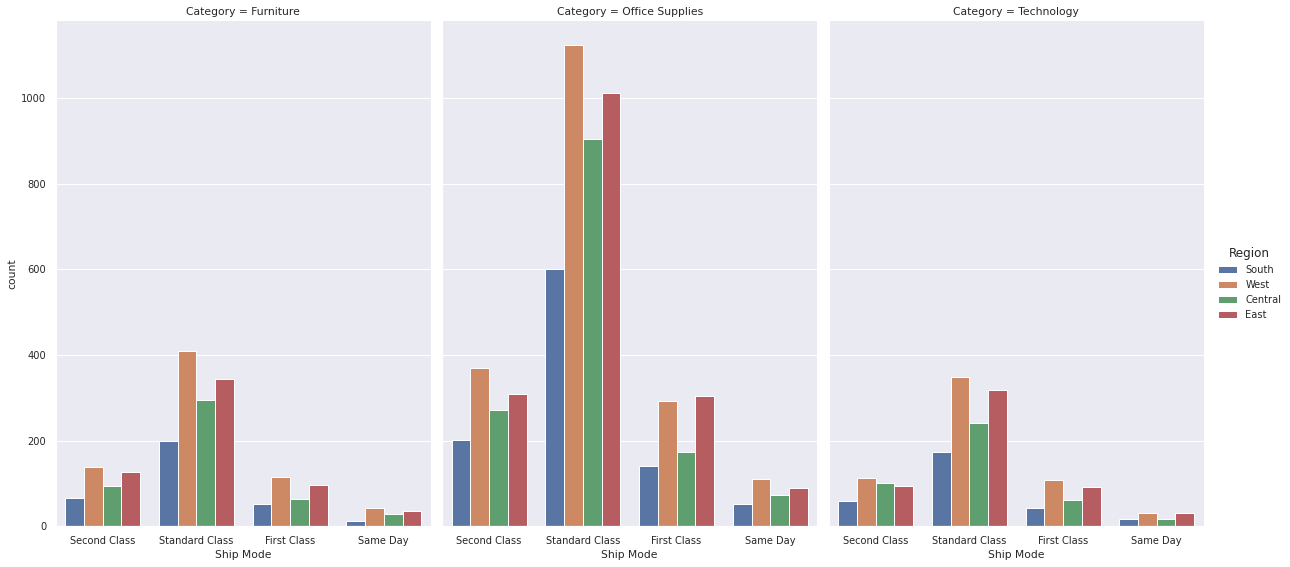

In [257]:
plt.figure(figsize=(20,10))
sns.catplot(x="Ship Mode", hue="Region", col="Category",
                data=data, kind="count",
                height=8, aspect=.7);

we can see that for any category, Standard class shiping mode is highest with western region

#### **Continuous variables**

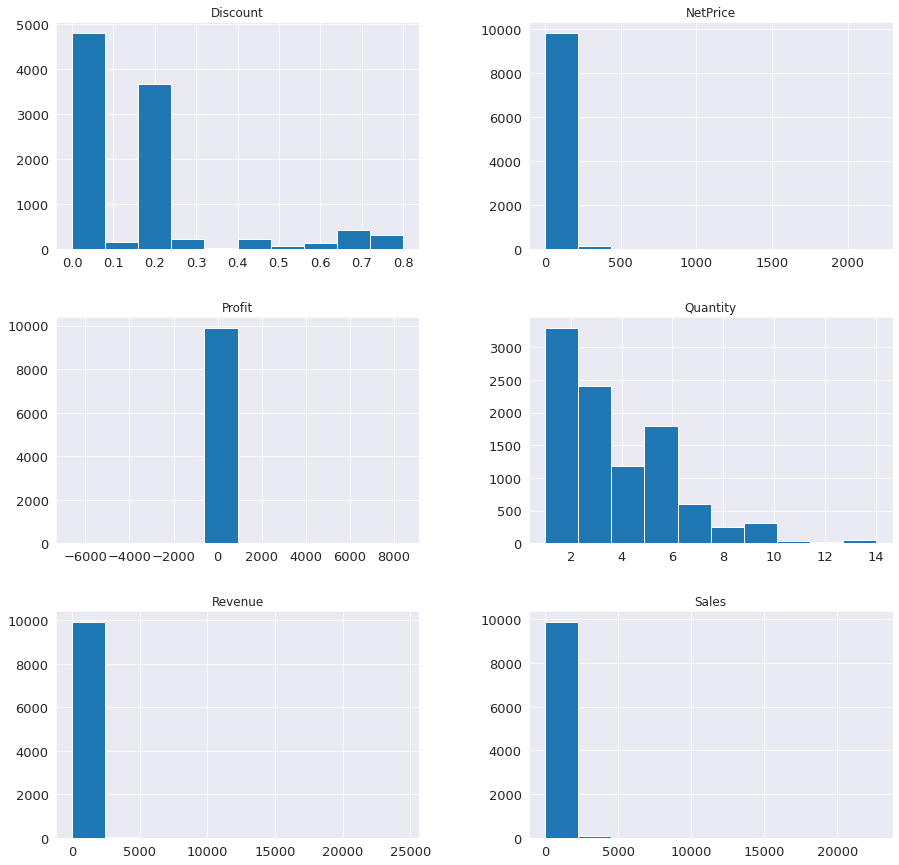

In [ ]:
df_Continuous = data.select_dtypes(include = ['float64', 'int64']) 
#To make histograms of continuous variables to see their data distributions
sns.set_style('darkgrid')
df_Continuous.hist(figsize=(15,15),xlabelsize=13, ylabelsize=13);

#### **Continuous vs category variables insights**

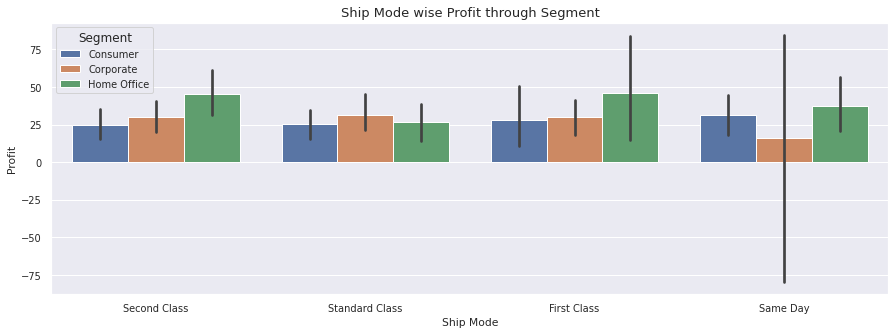

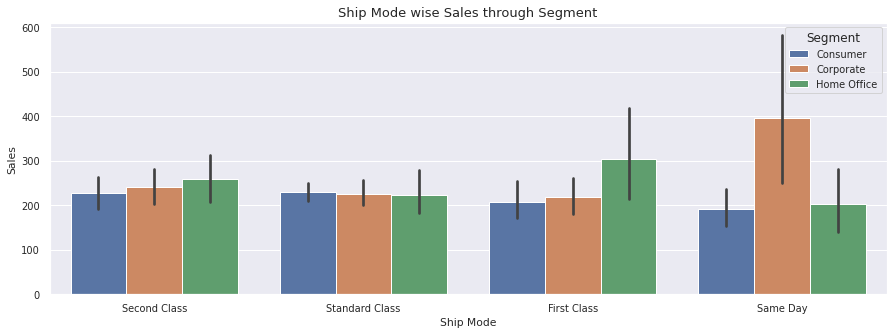

In [237]:
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Profit", hue="Segment", data=data);plt.title('Ship Mode wise Profit through Segment',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Sales", hue="Segment", data=data);plt.title('Ship Mode wise Sales through Segment',fontsize = 13)
plt.show()

Profit are lowest on same day shipping mode for corporate segment.

Sales are highest on same day shipping mode for corporate segment

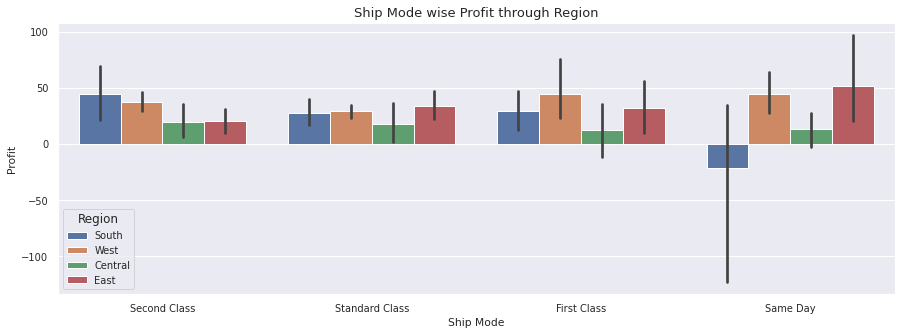

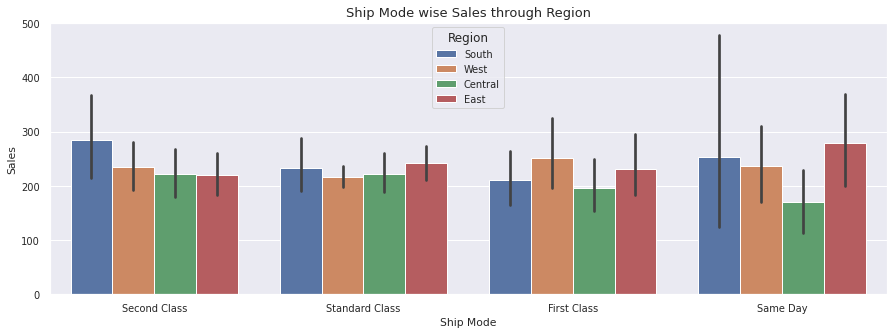

In [241]:
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Profit", hue="Region", data=data);plt.title('Ship Mode wise Profit through Region',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Sales", hue="Region", data=data);plt.title('Ship Mode wise Sales through Region',fontsize = 13)
plt.show()

Profit are lowest on same day shiiping mode in South region.

sales are almost same for any shipping mode in every region.

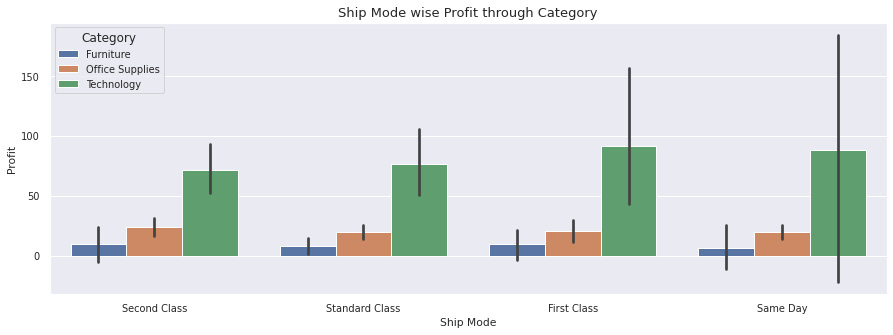

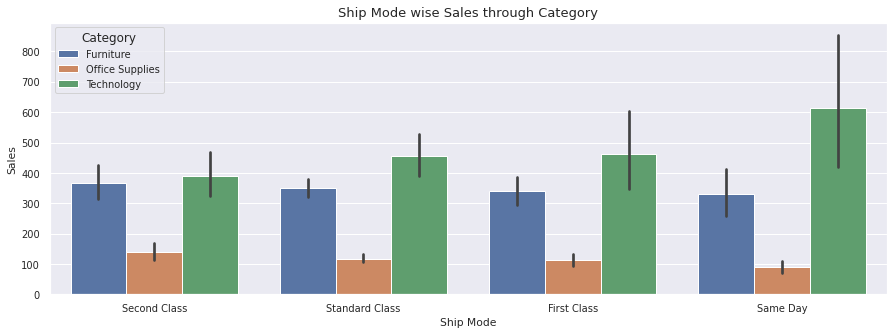

In [242]:
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Profit", hue="Category", data=data);plt.title('Ship Mode wise Profit through Category',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Ship Mode", y="Sales", hue="Category", data=data);plt.title('Ship Mode wise Sales through Category',fontsize = 13)
plt.show()

profit by Furniture is lowest in every shipping mode.

Sales by Office Supplies is lowest in every shipping mode.

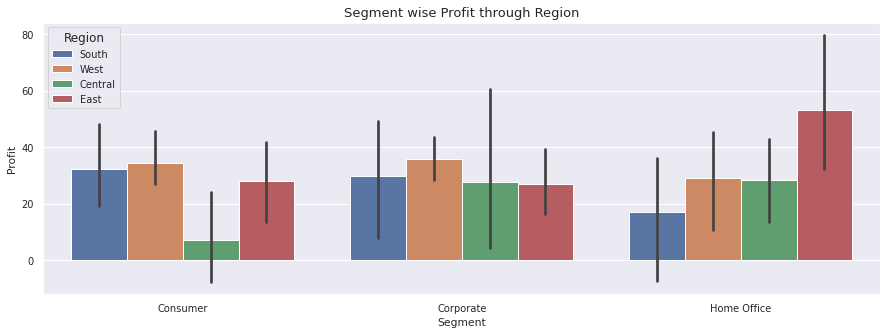

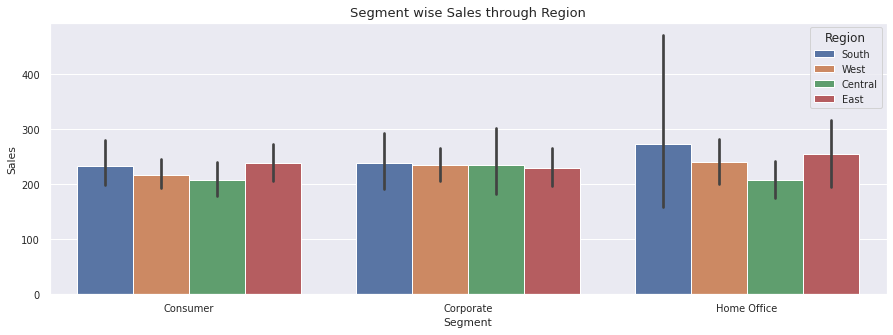

In [240]:
plt.figure(figsize=(15,5));
sns.barplot(x="Segment", y="Profit", hue="Region", data=data);plt.title('Segment wise Profit through Region',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Segment", y="Sales", hue="Region", data=data);plt.title('Segment wise Sales through Region',fontsize = 13)
plt.show()

Profit are lowest in Central region through consumer segment.

sales are almost same for any shipping mode with segment.

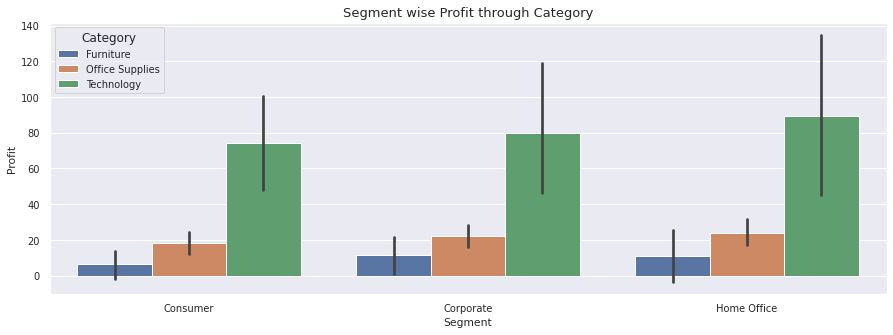

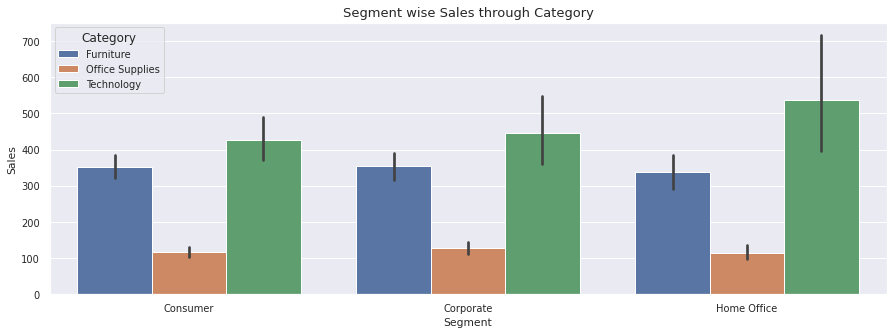

In [243]:
plt.figure(figsize=(15,5));
sns.barplot(x="Segment", y="Profit", hue="Category", data=data);plt.title('Segment wise Profit through Category',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Segment", y="Sales", hue="Category", data=data);plt.title('Segment wise Sales through Category',fontsize = 13)
plt.show()

profit by Furniture is lowest in every segment.

Sales by Office Supplies is lowest in every segment.

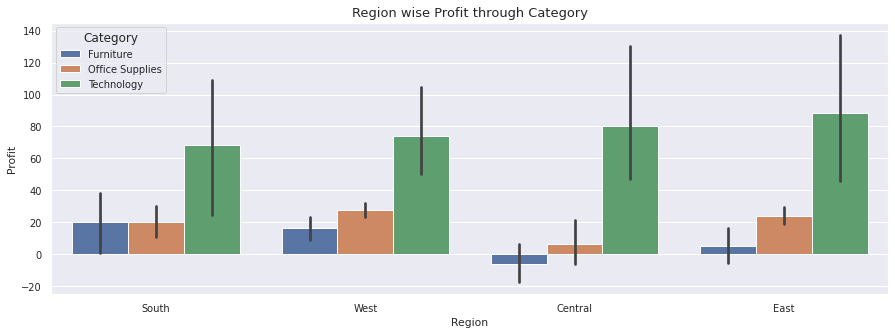

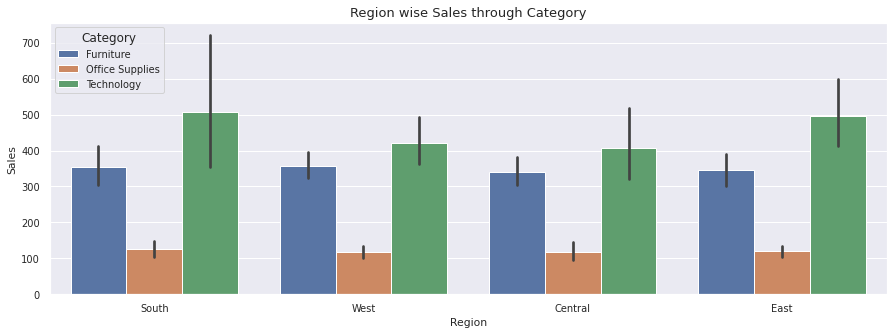

In [244]:
plt.figure(figsize=(15,5));
sns.barplot(x="Region", y="Profit", hue="Category", data=data);plt.title('Region wise Profit through Category',fontsize = 13)
plt.figure(figsize=(15,5));
sns.barplot(x="Region", y="Sales", hue="Category", data=data);plt.title('Region wise Sales through Category',fontsize = 13)
plt.show()

profit by Furniture is lowest in every Category.

Sales by Office Supplies is lowest in every Category.

#### **Checking for Outliers**

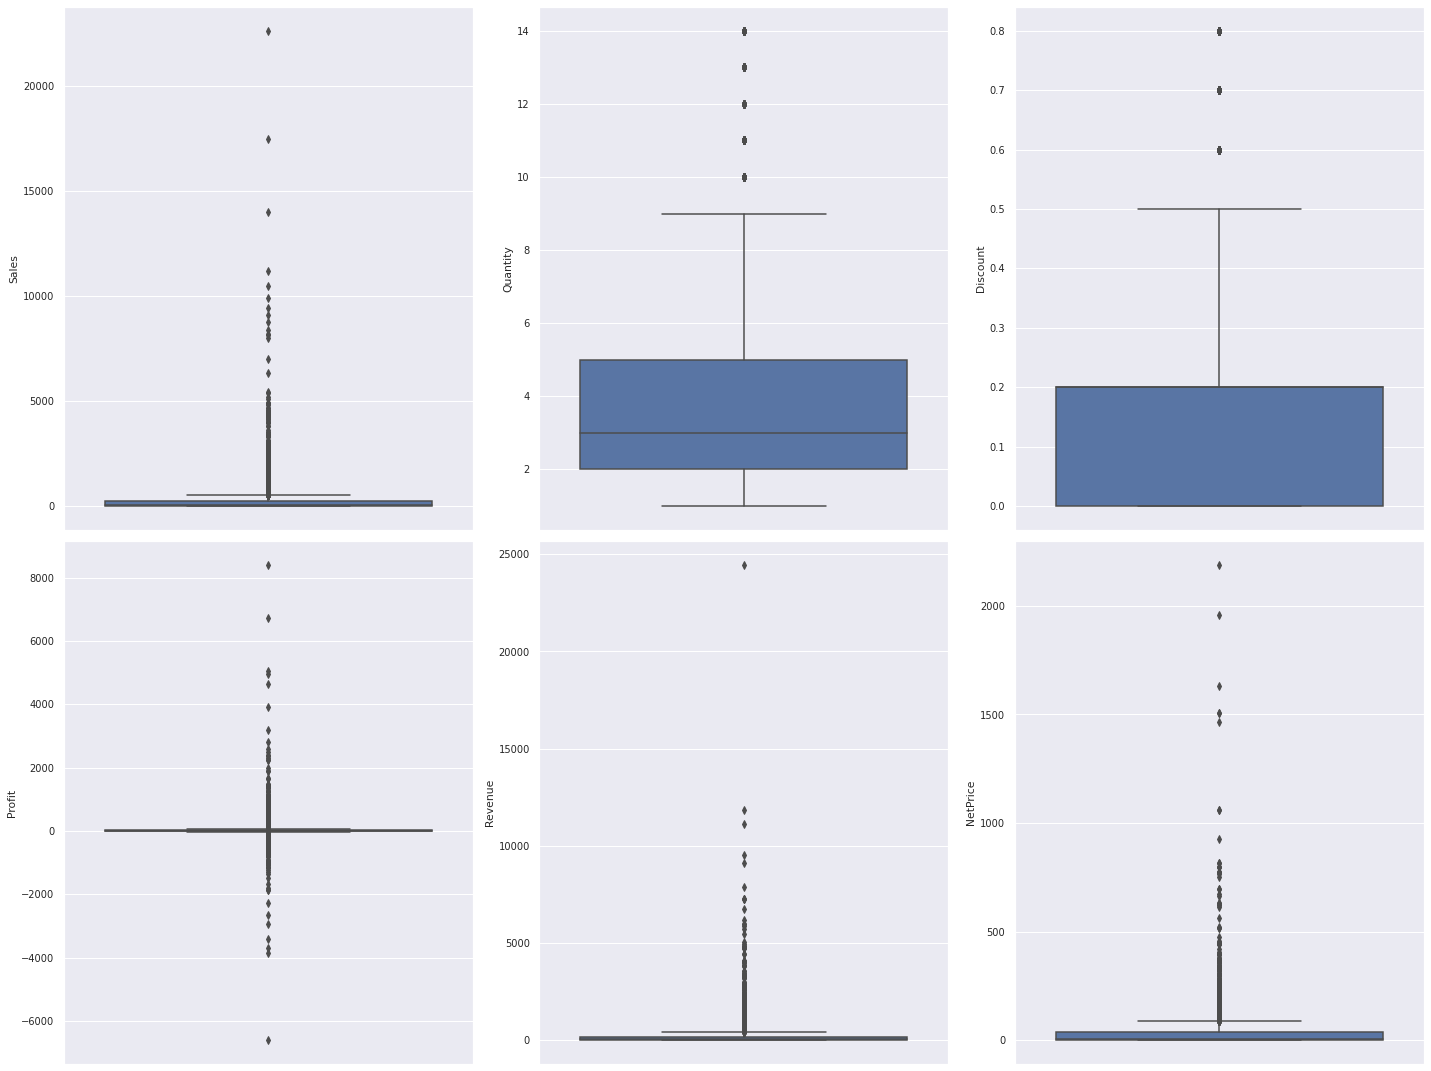

In [213]:
#To detect the outlier in the data using the boxplot diagram
l=df_Continuous.columns
n=len(l)
number_of_figures_columnwise=3
number_of_figures_rowwise = (n-1)/number_of_figures_columnwise
plt.figure(figsize=(20,15))
for i in range(0,n):
    plt.subplot(number_of_figures_rowwise + 1,number_of_figures_columnwise,i+1)
    sns.set_style('darkgrid')
    sns.boxplot(data[l[i]],orient='v')
    plt.tight_layout()

#### **Heatmap**

Text(0.5, 1.0, 'Correlation matrix')

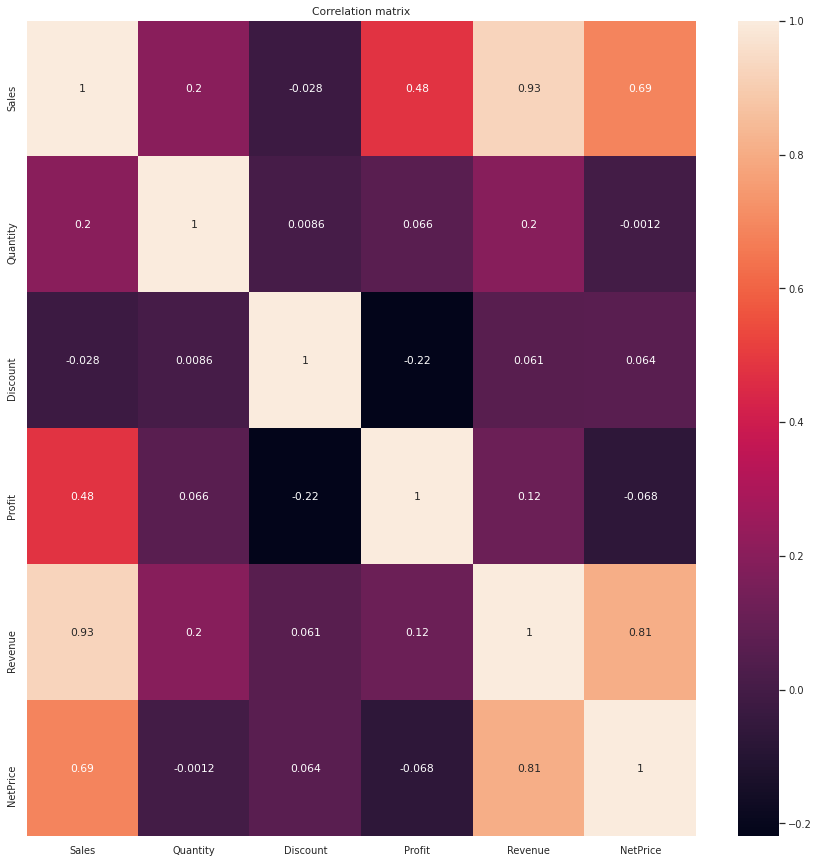

In [ ]:
plt.figure(figsize=(15,15))
sns.set(style='whitegrid', font_scale=0.9)
corrs = data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs,annot=True)
plt.title('Correlation matrix')

We can see there is negative correaltion between Discount & Profit so we can say that, as discount increases Companny's profits are decreases

### **Grouping columns to get insights**

In [258]:
data[['Sales','Profit', 'Discount']].groupby(['Sales'], as_index=False).mean().sort_values(by='Discount', ascending=False)

,Sales,Profit,Discount
50,1.788,-3.039600,0.8
2330,43.372,-69.395200,0.8
2368,44.848,-67.272000,0.8
2472,48.632,-121.580000,0.8
2479,48.784,-131.716800,0.8
...,...,...,...
4440,249.950,71.652333,0.0
4441,250.260,72.575400,0.0
375,5.470,2.352100,0.0
2708,58.380,26.271000,0.0


### **Pivot tables to get insights**

In [266]:
data.pivot_table(index=["Ship Mode"], values=["Sales","Profit","Discount","Quantity"], aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Ship Mode,,,,
First Class,253.17,48969.8399,5693.0,3.514284e+05
Same Day,82.75,15891.7589,1960.0,1.283631e+05
Second Class,270.15,57446.6354,7423.0,4.591936e+05
Standard Class,955.02,164088.7875,22797.0,1.358216e+06


Lowest sales & profits are from same day ship mode.

In [ ]:
data.pivot_table(index=["Segment"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Segment,,,,
Consumer,820.91,134119.2092,19521.0,1.161401e+06
Corporate,477.85,91979.1340,11608.0,7.061464e+05
Home Office,262.33,60298.6785,6744.0,4.296531e+05


Lowest sales are from consumer segment & lowest profits are from Home office segment

In [ ]:
data.pivot_table(index=["Category"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Category,,,,
Furniture,368.89,18451.2728,8028.0,741999.7953
Office Supplies,947.80,122490.8008,22906.0,719047.0320
Technology,244.40,145454.9481,6939.0,836154.0330


Lowest sales are from office supplies category & lowest profits are from furniture category.

In [ ]:
data.pivot_table(index=["Sub-Category"],values=["Sales","Profit","Discount","Quantity"], aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Sub-Category,,,,
Accessories,60.80,41936.6357,2976.0,167380.3180
Appliances,77.60,18138.0054,1729.0,107532.1610
Art,59.60,6527.7870,3000.0,27118.7920
Binders,567.00,30221.7633,5974.0,203412.7330
Bookcases,48.14,-3472.5560,868.0,114879.9963
Chairs,105.00,26590.1663,2356.0,328449.1030
Copiers,11.00,55617.8249,234.0,149528.0300
Envelopes,20.40,6964.1767,906.0,16476.4020
Fasteners,17.80,949.5182,914.0,3024.2800


Lowest sales are from fasteners sub-category & lowest profits are from tables sub-category.

In [ ]:
data.pivot_table(index=["Region"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)

,Discount,Profit,Quantity,Sales
Region,,,,
Central,558.34,39706.3625,8780.0,501239.8908
East,414.00,91522.7800,10618.0,678781.2400
South,238.55,46749.4303,6209.0,391721.9050
West,350.20,108418.4489,12266.0,725457.8245


Lowest sales are from South Region & lowest profits are from central region.

In [279]:
pivot=data.pivot_table(index=["State"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)
x=pivot.sort_values('Sales', ascending=True)
x.head(10)

,Discount,Profit,Quantity,Sales
State,,,,
North Dakota,0.0,230.1497,30.0,919.910
West Virginia,0.3,185.9216,18.0,1209.824
Maine,0.0,454.4862,35.0,1270.530
South Dakota,0.0,394.8283,42.0,1315.560
Wyoming,0.2,100.1960,4.0,1603.136
District of Columbia,0.0,1059.5893,40.0,2865.020
Kansas,0.0,836.4435,74.0,2914.310
Idaho,1.8,826.7231,64.0,4382.486
Iowa,0.0,1183.8119,112.0,4579.760


Top 10 States of Lowest sales of the company are North Dakota, West virginia, Maine, South Dakota, Wyoming, District of Columbia, Kansas, Idaho, Iowa, New mexico.

In [278]:
pivot=data.pivot_table(index=["State"], values=["Sales","Profit","Discount","Quantity"],  aggfunc =np.sum)
y=pivot.sort_values('Profit', ascending=True)
y.head(10)

,Discount,Profit,Quantity,Sales
State,,,,
Texas,364.64,-25729.3563,3724.0,170188.0458
Ohio,152.40,-16971.3766,1759.0,78258.1360
Pennsylvania,192.90,-15559.9603,2153.0,116511.9140
Illinois,191.90,-12607.8870,1845.0,80166.1010
North Carolina,70.60,-7490.9122,983.0,55603.1640
Colorado,57.60,-6527.8579,693.0,32108.1180
Tennessee,53.30,-5341.6936,681.0,30661.8730
Arizona,68.00,-3427.9246,862.0,35282.0010
Florida,114.65,-3399.3017,1379.0,89473.7080


Top 10 States of lowest Profits of the company are Texas, Ohio, Pennsylvania, lllinois, North Carolina, Colorado, Tennessee, Arizona, Florida, Oregon.



###Insights


**(1)** **Overall Sales of the company is  22,97,201 dollors. Overall Profits of the company is  2,86,397 dollors.**
****

**(2)Profit are lowest & Sales are highest on same day shipping mode for corporate segment.**

**Profit are lowest on same day shiiping mode in South region.**

**Profit are lowest in Central region through consumer segment.**

**profit by Furniture is lowest in every shipping mode, Segment, Category.**

**Sales by Office Supplies is lowest in every shipping mode, Segment, Category.**

**sales are almost same for any shipping mode with segment.**
****

**(3)There is negative correaltion between Discount & Profit so we can say that, as discount increases Companny's profits are decreases**
****

**(4)There is negative correaltion between Discount & Profit so we can say that, as discount increases Companny's profits are decreases**
****

**(5)Top 10 States of Lowest sales of the company are North Dakota, West virginia, Maine, South Dakota, Wyoming, District of Columbia, Kansas, Idaho, Iowa, New mexico.**

**Top 10 States of lowest Profits of the company are Texas, Ohio, Pennsylvania, lllinois, North Carolina, Colorado, Tennessee, Arizona, Florida, Oregon.**